Import Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import joblib


Load and Preprocess the Dataset

In [6]:
# Loading the dataset
file_path = "hydroponic_farming_dataset.csv"
data = pd.read_csv(file_path)

# Encoding categorical "Crop" column using LabelEncoder
label_encoder = LabelEncoder()
data["Crop"] = label_encoder.fit_transform(data["Crop"])

# Printing crop encoding mapping
crop_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Crop Encoding in Dataset:", crop_mapping)

# Defining Features (X) and Target Variable (y)
X = data.drop(columns=["pH"])  # Features (all columns except 'pH')
y = data["pH"]  # Target variable ('pH')

# Standardize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Printing the first few rows of the encoded dataset
print("Encoded Dataset:\n", data.head())

Crop Encoding in Dataset: {'Bell Pepper': 0, 'Bitter Gourd': 1, 'Carrot': 2, 'Corn': 3, 'Cucumber': 4, 'Eggplant': 5, 'Green Chili': 6, 'Lettuce': 7, 'Mustard Greens': 8, 'Pechay': 9, 'Squash': 10, 'Tomato': 11, 'Watermelon': 12}
Encoded Dataset:
      pH  Soil EC (dS/m)  Nitrogen (ppm)  Phosphorus (ppm)  Potassium (ppm)  \
0  6.76            2.50           65.43             40.20           193.59   
1  6.63            2.37           72.64             35.81           247.62   
2  6.27            1.63           51.90             53.25           287.98   
3  6.35            1.63           77.86             35.01           292.99   
4  6.42            1.39           93.24             54.04           151.43   

   Moisture (%)  Temperature (°C)  Crop  
0         68.62             22.37     2  
1         61.57             22.98     2  
2         57.65             22.70     2  
3         75.91             19.25     2  
4         77.73             19.93     2  


Visualizations

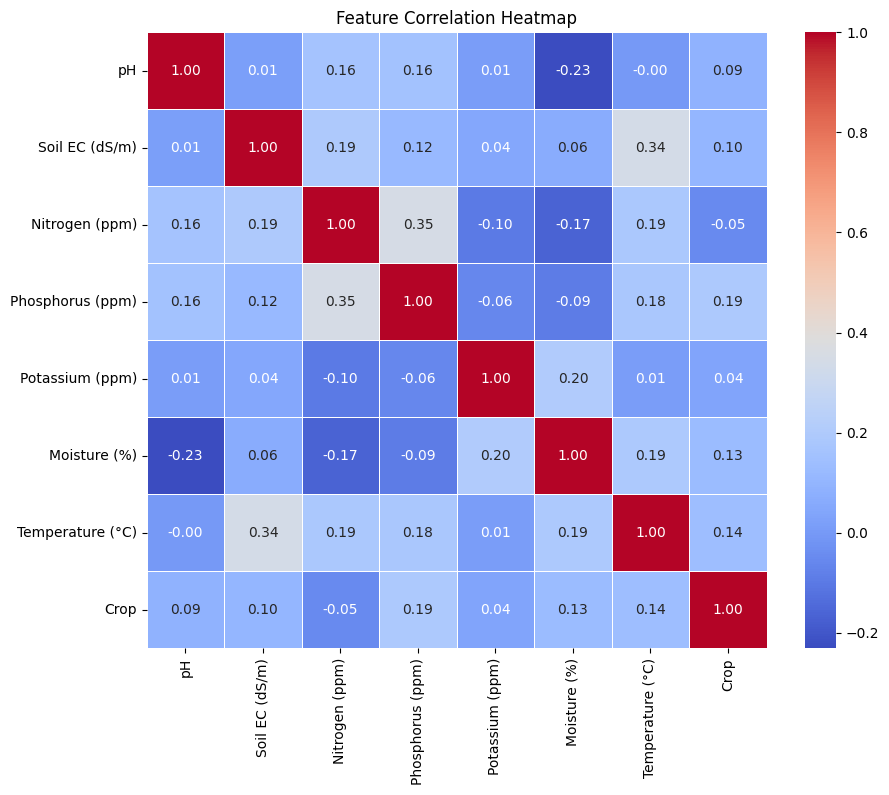

In [21]:
# Correlation Heatmap
# Encode categorical "Crop" column
data["Crop"] = data["Crop"].astype("category").cat.codes

# Compute the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

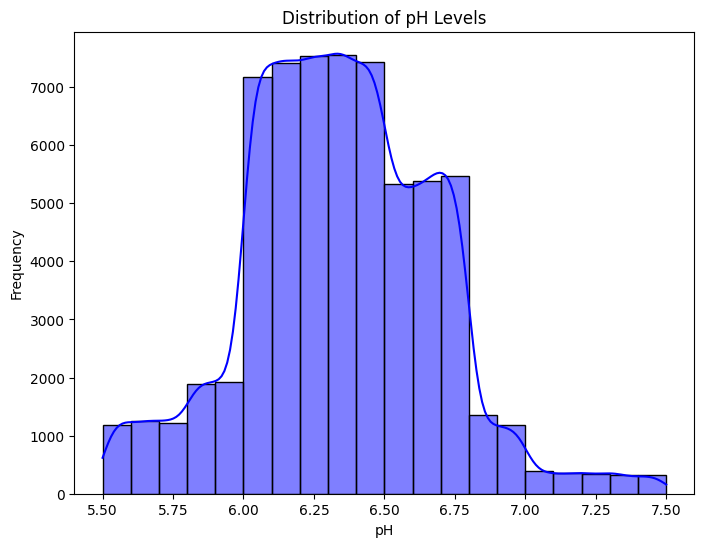

In [24]:
# Histogram of pH Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['pH'], bins=20, kde=True, color='blue')
plt.title('Distribution of pH Levels')
plt.xlabel('pH')
plt.ylabel('Frequency')
plt.show()

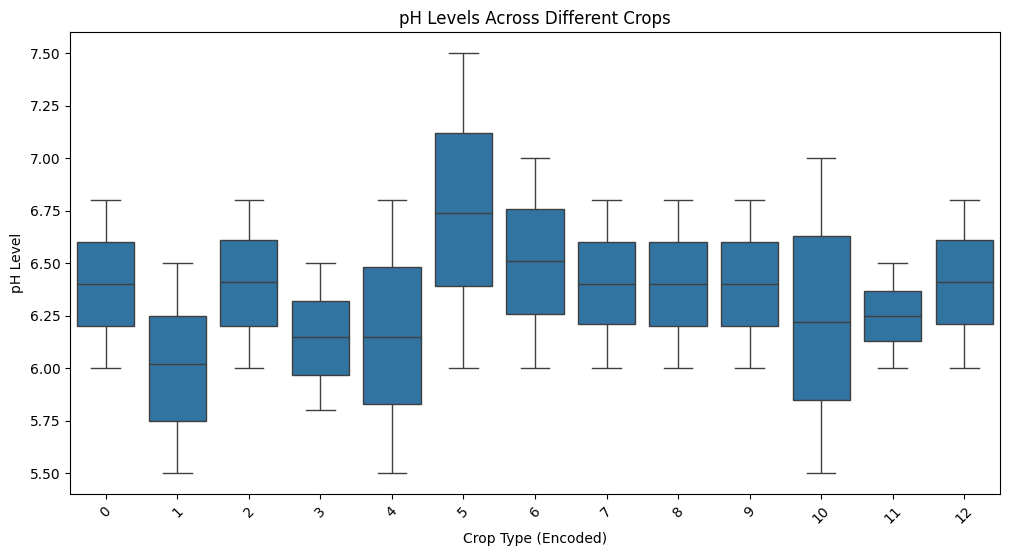

In [25]:
# Ph Levels Across Different Crops
plt.figure(figsize=(12, 6))
sns.boxplot(x=data["Crop"], y=data["pH"])
plt.title("pH Levels Across Different Crops")
plt.xlabel("Crop Type (Encoded)")
plt.ylabel("pH Level")
plt.xticks(rotation=45)
plt.show()

Train and Compare Models


In [7]:
# Train Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict
y_pred_lr = lr_model.predict(X_test)

# Evaluate
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f'Linear Regression - MSE: {mse_lr}, R2: {r2_lr}')

Linear Regression - MSE: 0.10345375409185997, R2: 0.09678338099178363


In [8]:
# Train Decision Tree Model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predict
y_pred_dt = dt_model.predict(X_test)

# Evaluate
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f'Decision Tree - MSE: {mse_dt}, R2: {r2_dt}')

Decision Tree - MSE: 0.16654737692307695, R2: -0.4540637989374299


In [9]:
# Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100,  max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest - MSE: {mse_rf}, R2: {r2_rf}')

Random Forest - MSE: 0.082904008819718, R2: 0.27619563730974517


Choosing the best model among Three we trained

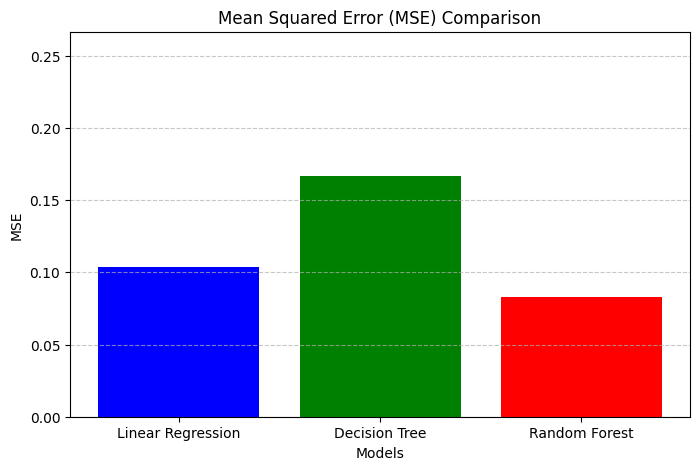

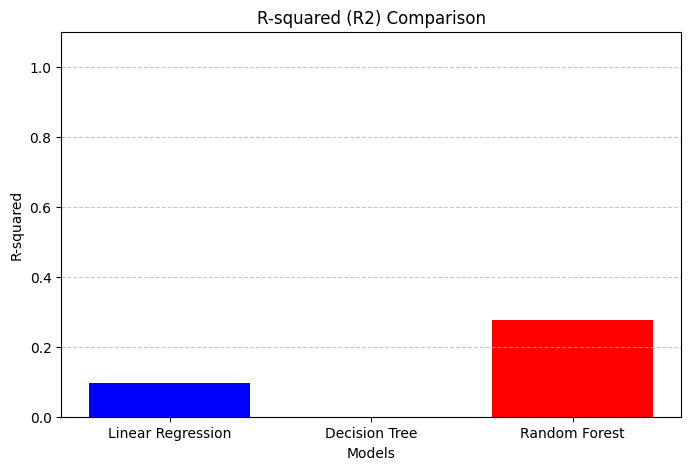

In [12]:
models = ['Linear Regression', 'Decision Tree', 'Random Forest']
mse_values = [mse_lr, mse_dt, mse_rf]
r2_values = [r2_lr, r2_dt, r2_rf]

# Bar chart for MSE
plt.figure(figsize=(8, 5))
plt.bar(models, mse_values, color=['blue', 'green', 'red'])
plt.title('Mean Squared Error (MSE) Comparison')
plt.xlabel('Models')
plt.ylabel('MSE')
plt.ylim(0, max(mse_values) + 0.1)  # Adjust y-axis limit
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Bar chart for R-squared
plt.figure(figsize=(8, 5))
plt.bar(models, r2_values, color=['blue', 'green', 'red'])
plt.title('R-squared (R2) Comparison')
plt.xlabel('Models')
plt.ylabel('R-squared')
plt.ylim(0, 1.1)  # R-squared ranges from 0 to 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [46]:
# Save the best-performing model (Random Forest in this case)
best_model = rf_model
joblib.dump(best_model, 'best_hydroponic_model.pkl', compress=3)

['best_hydroponic_model.pkl']

Make a Prediction

In [47]:
# Load the saved model
loaded_model = joblib.load('best_hydroponic_model.pkl')

# Predict on a single row of test data
sample = X_test[0:1]
prediction = loaded_model.predict(sample)

print(f'Predicted pH: {prediction[0]}')

Predicted pH: 6.3838204111886805


Plot the Loss Curve

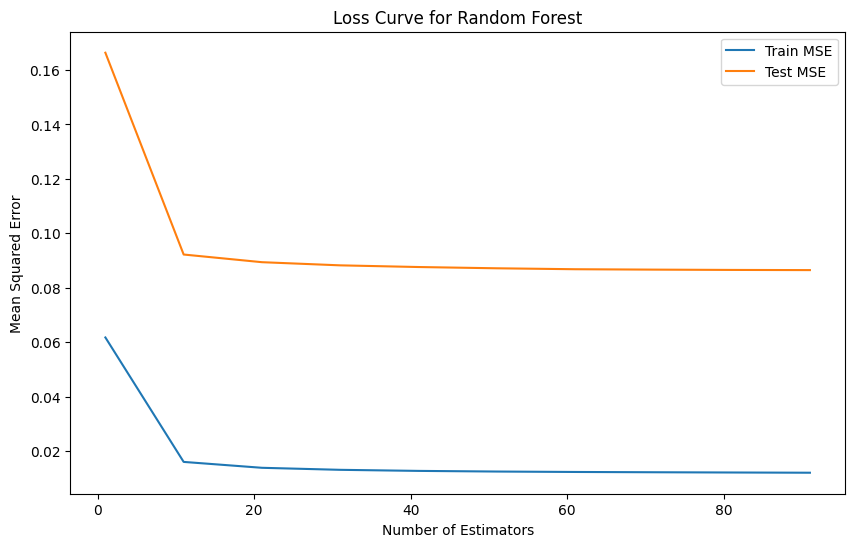

In [48]:
# Plotting the loss curve (MSE) for Random Forest
train_mse = []
test_mse = []
n_estimators_range = range(1, 101, 10)

for n in n_estimators_range:
    model = RandomForestRegressor(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    train_mse.append(mean_squared_error(y_train, model.predict(X_train)))
    test_mse.append(mean_squared_error(y_test, model.predict(X_test)))

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, train_mse, label='Train MSE')
plt.plot(n_estimators_range, test_mse, label='Test MSE')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Squared Error')
plt.title('Loss Curve for Random Forest')
plt.legend()
plt.show()